In [1]:
import pandas as pd

df = pd.read_csv("Advertising.csv")
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df = df.drop(columns=["Unnamed: 0"])
df.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

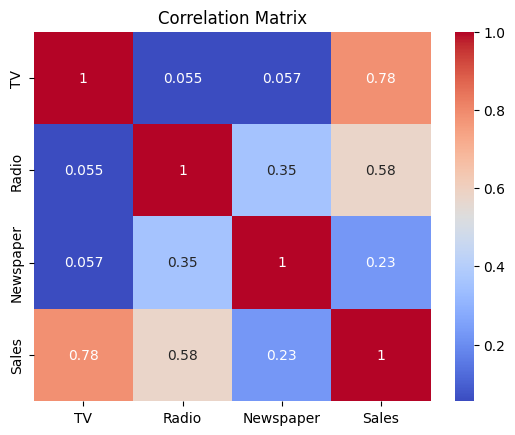

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
intercept = model.intercept_
coefficients = pd.Series(model.coef_, index=X.columns)

print(f"Intercept: {intercept:.3f}")
print("Coefficients:")
print(coefficients)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")
